In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import altair as alt
from altair import datum

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [78]:
file = open('../Base_PSO/converge_plot.txt')

t = []
fit_vals = []
my_dict = {}
i = 0
for line in file:
    i+= 1
    aux = line.rstrip('\n').split('/')
    aux = aux[:-1]
    for el in aux:
        numbers = el.split(" ")
        
        t = int(numbers[0])
        fit_val = float(numbers[1])
        
        try:
            my_dict[t] = np.append(my_dict[t], fit_val)
        except KeyError:
            my_dict[t] = np.array([fit_val])
            

In [79]:
lens = []
means = []
iterations = []
for k in my_dict.keys():
    values = my_dict.get(k)
    lens.append(len(values))
    means.append(np.mean(values))
    iterations.append(k)

In [82]:
size = i
perc = np.array([0.05,0.5,0.8,0.99])
diff = size*perc

converged = size-np.array(lens)

conv = [sum(converged<num) for num in diff]
split = conv[-1]

In [83]:
conv

[100, 105, 110, 178]

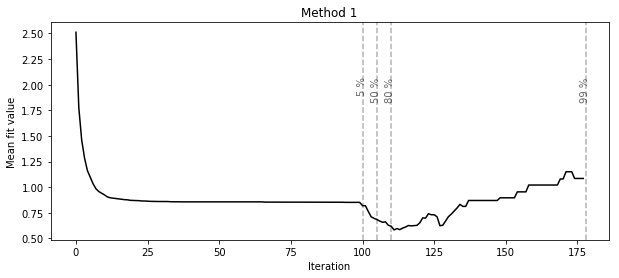

In [85]:
fig = plt.figure(figsize = (10,4))
plt.plot(iterations[:split],means[:split], color = "k")
plt.title("Method 1")
plt.xlabel("Iteration")
plt.ylabel("Mean fit value")

for i in range(len(conv)):
    plt.axvline(x=conv[i], color = "k", linestyle = "--", alpha = 0.3)
    plt.text(conv[i]-2, 2, str(int(perc[i]*100))+" %", rotation=90, alpha = 0.6)

plt.savefig("conv_1.jpg")
plt.show()

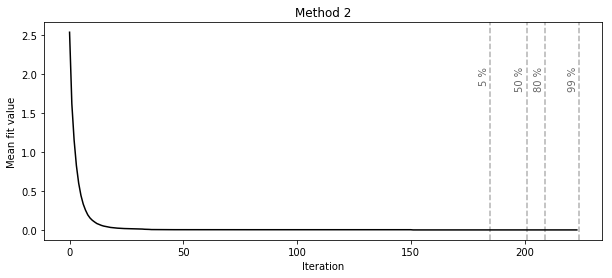

In [70]:
fig = plt.figure(figsize = (10,4))
plt.plot(iterations[:split],means[:split], color = "k")
plt.title("Method 2")
plt.xlabel("Iteration")
plt.ylabel("Mean fit value")

for i in range(len(conv)):
    plt.axvline(x=conv[i], color = "k", linestyle = "--", alpha = 0.3)
    plt.text(conv[i]-5, 2, str(int(perc[i]*100))+" %", rotation=90, alpha = 0.6)

plt.savefig("conv_1.jpg")
plt.show()

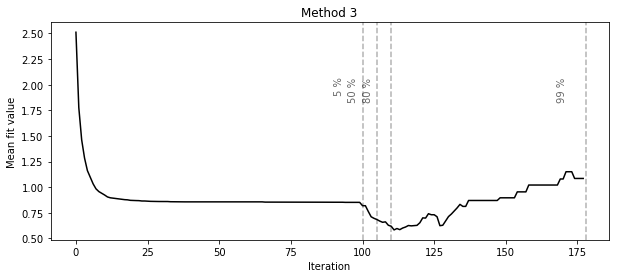

In [76]:
fig = plt.figure(figsize = (10,4))
plt.plot(iterations[:split],means[:split], color = "k")
plt.title("Method 3")
plt.xlabel("Iteration")
plt.ylabel("Mean fit value")

for i in range(len(conv)):
    plt.axvline(x=conv[i], color = "k", linestyle = "--", alpha = 0.3)
    plt.text(conv[i]-10, 2, str(int(perc[i]*100))+" %", rotation=90, alpha = 0.6)

plt.savefig("conv_1.jpg")
plt.show()

In [5]:
import matplotlib.pyplot as plt
#from labellines import labelLine, labelLines

file = open('../Base_PSO/simpler_version.txt')

pop_size = []
v_fraction = []
mean_iterations = []
mean_fit = []
mean_time = []

for line in file:
    aux = line.rstrip('\n').split('/')
    aux = aux[:-1]
    iterations = []
    fit = []
    time = []

    for iter in aux:
        value = iter.split(' ')
        iterations.append(int(value[2]))
        fit.append(float(value[3]))
        time.append(float(value[4]))

    aux2 = aux[0].split(' ')
    pop_size.append(int(aux2[0]))
    v_fraction.append(float(aux2[1]))
    mean_iterations.append(sum(iterations)/len(iterations))
    mean_fit.append(sum(fit)/len(fit))
    mean_time.append(sum(time)/len(time))

v_fraction_list = []
pop_size_list = []
mean_iterations_list = []
mean_fit_list = []
mean_time_list = []

for i in range(4):
    line1 = []
    line2 = []
    line3 = []
    line4 = []
    line5 = []
    for j in range(5):
        line1.append(pop_size[i * 5 + j])
        line2.append(mean_iterations[i * 5 + j])
        line3.append(mean_fit[i * 5 + j])
        line4.append(mean_time[i * 5 + j])
        line5.append(v_fraction[i * 5 + j])
    pop_size_list.append(line1)
    mean_iterations_list.append(line2)
    mean_fit_list.append(line3)
    mean_time_list.append(line4)
    v_fraction_list.append(line5)

In [6]:
out = pd.DataFrame()
out["vmax"]=v_fraction
out["iter"]=mean_iterations
out["fit_val"]=mean_fit
out["pop_size"]=pop_size

In [7]:
out.head()

,vmax,iter,fit_val,pop_size
0,0.9,116.943,0.829865,4
1,0.8,118.509,0.820934,4
2,0.7,120.319,0.712632,4
3,0.6,122.966,0.655987,4
4,0.5,126.261,0.535017,4


In [12]:
max_fit = round(max(out["fit_val"]), 2)
max_iter = max(out["iter"])+10

In [33]:
c = alt.Chart(out).mark_point(
    ).encode(
        x = alt.X("vmax", title = "Max Velocity", scale = alt.Scale(domain=[0,1])),
        y = alt.Y("iter:Q", title = "Iterations", scale=alt.Scale(domain=[80, max_iter])),
        color = alt.Color("pop_size:N",
                          legend = alt.Legend(title = "Pop. Size"),#values = [4,10,20,50],type = "symbol", title = "Pop. Size"),
                          scale = alt.Scale(range = ["rgb(200,200,200)","rgb(120,120,120)", "rgb(50,50,50)", "rgb(0,0,0)"])
                         ),
        size = alt.Size("fit_val:Q",
                        legend = alt.Legend(values = [0.01,0.5,max_fit], title = "Fit value"))
    ).properties(title = "Ackley's Function", 
    ).configure_axisBottom(grid = False)

c.save("images/chart_1.png")
c

JavascriptException: Message: javascript error: vl is not defined
JavaScript stack:
ReferenceError: vl is not defined
    at eval (eval at executeAsyncScript (:457:5), <anonymous>:11:28)
    at eval (eval at executeAsyncScript (:457:5), <anonymous>:25:12)
    at executeAsyncScript (<anonymous>:457:26)
    at apply.$schema (<anonymous>:473:29)
    at callFunction (<anonymous>:361:33)
    at <anonymous>:371:23
    at <anonymous>:372:3
  (Session info: headless chrome=73.0.3683.103)
  (Driver info: chromedriver=2.42.591088 (7b2b2dca23cca0862f674758c9a3933e685c27d5),platform=Windows NT 10.0.17134 x86_64)
